In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.11.3'

In [2]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('C:\\Users\\X474241\\OneDrive - Old Mutual\\Documents\\GitHub\\hypothesis_testing_with_insurance_data_core\\Data\\insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

1. State the Hypothesis & Null Hypothesis
 (Null Hypothesis): Smokers do not have higher insurance charges than non-smokers.
 (Alternative Hypothesis): Smokers have a significant higher insurance charges than non-smokers.
 
 - Numeric data
 - Two groups
 - 2-sample T-test

In [3]:
# check the col that contains the charges
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [4]:
# check the col that contains info on smokers vs non-smokers
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
# create a column that easily separates our groups
df['non_smoker'] = df['smoker'].str.contains('no')
df['non_smoker'].value_counts()

non_smoker
True     1064
False     274
Name: count, dtype: int64

In [6]:
# save list of columns needed for each group
needed_cols = ['non_smoker','charges']

df[needed_cols]

,non_smoker,charges
0,False,16884.92400
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
...,...,...
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350
1336,True,2007.94500


In [7]:
# save smoker team in separate variable
smoker_df = df.loc[ df['non_smoker']==False, needed_cols]
smoker_df

,non_smoker,charges
0,False,16884.92400
11,False,27808.72510
14,False,39611.75770
19,False,36837.46700
23,False,37701.87680
...,...,...
1313,False,36397.57600
1314,False,18765.87545
1321,False,28101.33305
1323,False,43896.37630


In [8]:
# save non_smokers in separate variables
non_smoker_df = df.loc[ df['non_smoker']==True, needed_cols]
non_smoker_df

,non_smoker,charges
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
5,True,3756.62160
...,...,...
1332,True,11411.68500
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350


In [9]:
# Make a df just for visualization by concat the groups 
plot_df = pd.concat([non_smoker_df, smoker_df])
plot_df

,non_smoker,charges
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
5,True,3756.62160
...,...,...
1313,False,36397.57600
1314,False,18765.87545
1321,False,28101.33305
1323,False,43896.37630


C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='non_smoker', ylabel='charges'>

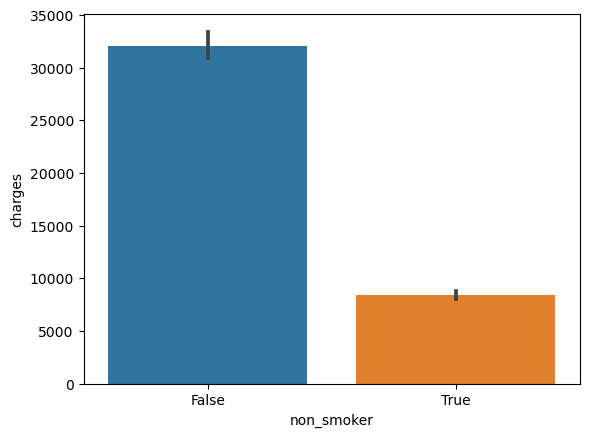

In [10]:
# visualize the group means
sns.barplot(data=plot_df, x='non_smoker',y='charges')

In [11]:
# Saving JUST the numeric col as final group variables
non_smokers = non_smoker_df['charges']
smokers = smoker_df['charges']
non_smokers

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [12]:
# Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smokers)) > 3
smoker_outliers.sum()

0

In [13]:
# Check non_smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smokers)) > 3
non_smoker_outliers.sum()

24

In [14]:
# remove outliers from non_smokers
non_smokers = non_smokers.loc[~non_smoker_outliers]
non_smokers

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [15]:
# Check non_smoker group for normality
result = stats.normaltest(non_smokers)
result.pvalue

2.6945416315543976e-36

In [16]:
# Check n for non_smoker group
len(non_smokers)

1040

In [17]:
# Check smoker group for normality
result = stats.normaltest(smokers)
result.pvalue

5.564930630036463e-14

In [18]:
# Check n for smoker group
len(smokers)

274

In [19]:
# Use Levene's test for equal variance
result = stats.levene(non_smokers, smokers)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [20]:
# Using an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [21]:
result = stats.ttest_ind(smokers, non_smokers, equal_var=False)
print(result)
result.pvalue  < .05

TtestResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104, df=301.26189518807416)


True

In [22]:
non_smokers.mean()

7939.8608446721155

In [23]:
smokers.mean()

32050.23183153284

There is a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that smokers have a significant higher insurance charges than non-smokers.

# Q2. Are men more likely to smoke than women?
1. State the Hypothesis & Null Hypothesis
 (Null Hypothesis): There is no difference in men and women when it comes to smoking.
 (Alternative Hypothesis): Men are significantly more likely to smoke than women.
 
 - Numeric data
 - Two groups
 - 2-sample T-test

In [24]:
# check the col that contains the smoker
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [25]:
#Convert taget to numeric values
df['smoker'] = df['smoker'].replace({'no':0, 'yes':1})

In [26]:
# check the col that contains info on male vs female
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [27]:
# create a column that easily separates our groups
df['has_female'] = df['sex'].str.contains('female')
df['has_female'].value_counts()

has_female
False    676
True     662
Name: count, dtype: int64

In [28]:
## save list of columns needed for each group
needed_cols = ['has_female','smoker']

df[needed_cols]

,has_female,smoker
0,True,1
1,False,0
2,False,0
3,False,0
4,False,0
...,...,...
1333,False,0
1334,True,0
1335,True,0
1336,True,0


In [29]:
# save list of columns needed for each group
needed_cols = ['has_female','smoker']

df[needed_cols]

,has_female,smoker
0,True,1
1,False,0
2,False,0
3,False,0
4,False,0
...,...,...
1333,False,0
1334,True,0
1335,True,0
1336,True,0


In [30]:
# save male team in separate variable
male_df = df.loc[ df['has_female']==False, needed_cols]
male_df

,has_female,smoker
1,False,0
2,False,0
3,False,0
4,False,0
8,False,0
...,...,...
1324,False,0
1325,False,0
1327,False,0
1329,False,0


In [31]:
# save female team in separate variables
female_df = df.loc[ df['has_female']==True, needed_cols]
female_df

,has_female,smoker
0,True,1
5,True,0
6,True,0
7,True,0
9,True,0
...,...,...
1332,True,0
1334,True,0
1335,True,0
1336,True,0


In [32]:
# Make a df just for visualization by concat the groups 
plot_df = pd.concat([female_df, male_df])
plot_df

,has_female,smoker
0,True,1
5,True,0
6,True,0
7,True,0
9,True,0
...,...,...
1324,False,0
1325,False,0
1327,False,0
1329,False,0


C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='has_female', ylabel='smoker'>

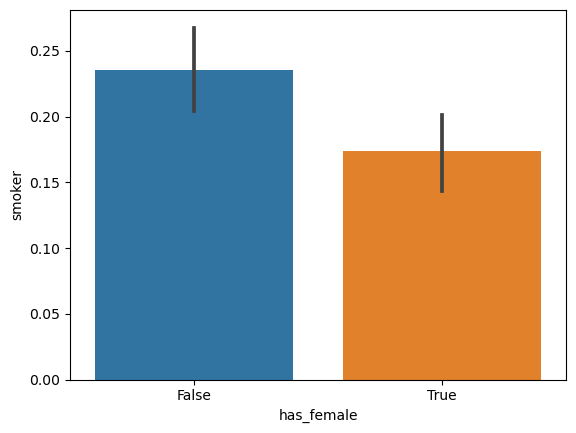

In [33]:
# visualize the group means
sns.barplot(data=plot_df, x='has_female',y='smoker')

In [34]:
# Saving JUST the numeric col as final group variables
female = female_df['smoker']
male = male_df['smoker']
female

0       1
5       0
6       0
7       0
9       0
       ..
1332    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 662, dtype: int64

In [35]:
# Check female group for outliers
female_outliers = np.abs(stats.zscore(female)) > 3
female_outliers.sum()

0

In [36]:
# Check male group for outliers
male_outliers = np.abs(stats.zscore(male)) > 3
male_outliers.sum()

0

In [37]:
# Check female group for normality
result = stats.normaltest(female)
result.pvalue

1.5451615879700298e-40

In [38]:
# Check n for female group
len(female)

662

In [39]:
# Check male group for normality
result = stats.normaltest(male)
result.pvalue

2.9790348129116147e-27

In [40]:
# Check n for male group
len(male)

676

In [41]:
# Use Levene's test for equal variance
result = stats.levene(male, female)
print(result)

LeveneResult(statistic=7.799582538314033, pvalue=0.005300369127378653)


In [42]:
# Using an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [43]:
result = stats.ttest_ind(male, female, equal_var=False)
print(result)
result.pvalue  < .05

TtestResult(statistic=2.796061125594804, pvalue=0.005247684396227776, df=1324.8964937722553)


True

In [44]:
male.mean()

0.23520710059171598

In [45]:
female.mean()

0.17371601208459214

There is a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that men are significantly more likely to smoke than women.

# Q3. Do different regions have different charges, on average?
 (Null Hypothesis): Different regions do not have different charges, on average.
 (Alternative Hypothesis): Different regions have significantly high different charges, on average.
 
 - Numerical Data
 - More than two groups/samples
 - We want to run an ANOVA test.

In [47]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


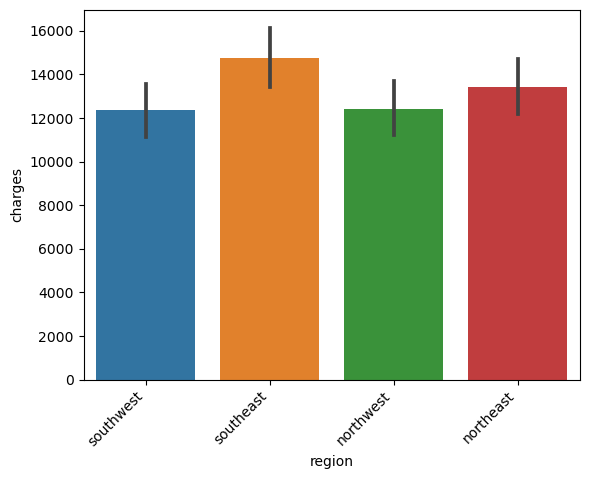

In [48]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [49]:
needed_cols = ['region','charges']
df[needed_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [51]:
groups ={}

for region in df['region'].unique():
    temp = df.loc[df['region']== region, 'charges']
    groups[region] = temp

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [53]:
groups['northwest']

3       21984.47061
4        3866.85520
7        7281.50560
9       28923.13692
24       6203.90175
           ...     
1319     7201.70085
1320     5425.02335
1324     4239.89265
1333    10600.54830
1337    29141.36030
Name: charges, Length: 325, dtype: float64

In [56]:
# Loop through groups dict
for region, data in groups.items():

    # determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    # print a statement about how many outliers for which group name
    print(f"There are {outliers.sum()} outliers in the {region} group.")

    # Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[region] = data

There are 3 outliers in the southwest group.
There are 0 outliers in the southeast group.
There are 5 outliers in the northwest group.
There are 2 outliers in the northeast group.


In [57]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for region, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([region,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,southwest,311,7.229041e-22,True
1,southeast,362,1.936990e-13,True
2,northwest,307,5.465988e-14,True
3,northeast,315,2.113339e-16,True


In [58]:
# Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=16.781243958586817, pvalue=1.0690396509032777e-10)


In [59]:
# Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [60]:
# Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=9.83393663828688, pvalue=0.020031782406515642)


True

Our Kruskal Wallis test returned a p-value MUCH less than .05. We reject the null hypothesis and conclude that different regions do not have different charges, on average.

# Post-Hoc Multiple Comparison Test

In [61]:
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [62]:
## slice a test sector
temp = groups['northwest']
temp

3       21984.47061
4        3866.85520
7        7281.50560
9       28923.13692
24       6203.90175
           ...     
1319     7201.70085
1320     5425.02335
1324     4239.89265
1333    10600.54830
1337    29141.36030
Name: charges, Length: 307, dtype: float64

In [63]:
pd.DataFrame({'charges':temp, 'region':'northwest'})

,charges,region
3,21984.47061,northwest
4,3866.85520,northwest
7,7281.50560,northwest
9,28923.13692,northwest
24,6203.90175,northwest
...,...,...
1319,7201.70085,northwest
1320,5425.02335,northwest
1324,4239.89265,northwest
1333,10600.54830,northwest


In [65]:
# make a list for saving the dataframes to
tukeys_dfs = []

# Loop through groups dict's items
for region, temp in groups.items():
    
    # make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'charges':temp, 'region':region})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
# concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,charges,region
0,16884.92400,southwest
12,1826.84300,southwest
15,1837.23700,southwest
18,10602.38500,southwest
19,36837.46700,southwest
...,...,...
1321,28101.33305,northeast
1325,13143.33665,northeast
1326,7050.02130,northeast
1328,22395.74424,northeast


In [66]:
values = tukeys_data['charges']
labels = tukeys_data['region']

tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-1899.1481,0.1087,-4062.9978,264.7016,False
northeast,southeast,2034.3568,0.0578,-44.5793,4113.2928,False
northeast,southwest,-1608.5096,0.2207,-3765.3006,548.2814,False
northwest,southeast,3933.5049,0.0,1840.1351,6026.8747,True
northwest,southwest,290.6385,0.986,-1880.0685,2461.3456,False
southeast,southwest,-3642.8664,0.0,-5728.939,-1556.7938,True


In [67]:
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,northeast,northwest,-1899.1481,0.1087,-4062.9978,264.7016,False
1,northeast,southeast,2034.3568,0.0578,-44.5793,4113.2928,False
2,northeast,southwest,-1608.5096,0.2207,-3765.3006,548.2814,False
3,northwest,southeast,3933.5049,0.0000,1840.1351,6026.8747,True
4,northwest,southwest,290.6385,0.9860,-1880.0685,2461.3456,False
5,southeast,southwest,-3642.8664,0.0000,-5728.9390,-1556.7938,True


In [68]:
pd.set_option('display.max_rows',120)
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,northeast,northwest,-1899.1481,0.1087,-4062.9978,264.7016,False
1,northeast,southeast,2034.3568,0.0578,-44.5793,4113.2928,False
2,northeast,southwest,-1608.5096,0.2207,-3765.3006,548.2814,False
3,northwest,southeast,3933.5049,0.0000,1840.1351,6026.8747,True
4,northwest,southwest,290.6385,0.9860,-1880.0685,2461.3456,False
5,southeast,southwest,-3642.8664,0.0000,-5728.9390,-1556.7938,True


C:\Users\X474241\AppData\Local\Temp\ipykernel_14320\3564246639.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax = sns.barplot(data=tukeys_data, x='region', y='charges', ci=68)
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\X474241\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

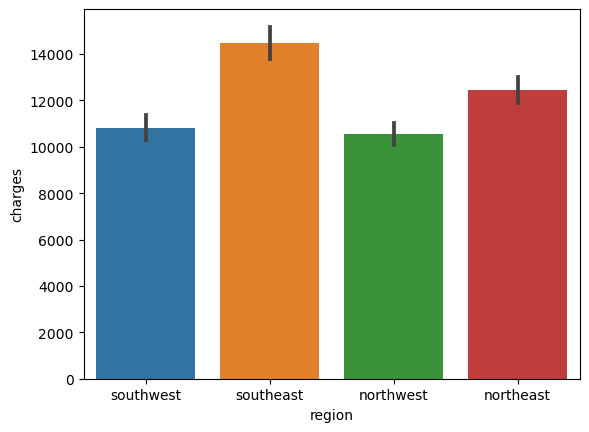

In [69]:
# make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='region', y='charges', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right');

In [70]:
# Not significantly different
tukeys_df[tukeys_df['reject'] ==False]

,group1,group2,meandiff,p-adj,lower,upper,reject
0,northeast,northwest,-1899.1481,0.1087,-4062.9978,264.7016,False
1,northeast,southeast,2034.3568,0.0578,-44.5793,4113.2928,False
2,northeast,southwest,-1608.5096,0.2207,-3765.3006,548.2814,False
4,northwest,southwest,290.6385,0.9860,-1880.0685,2461.3456,False


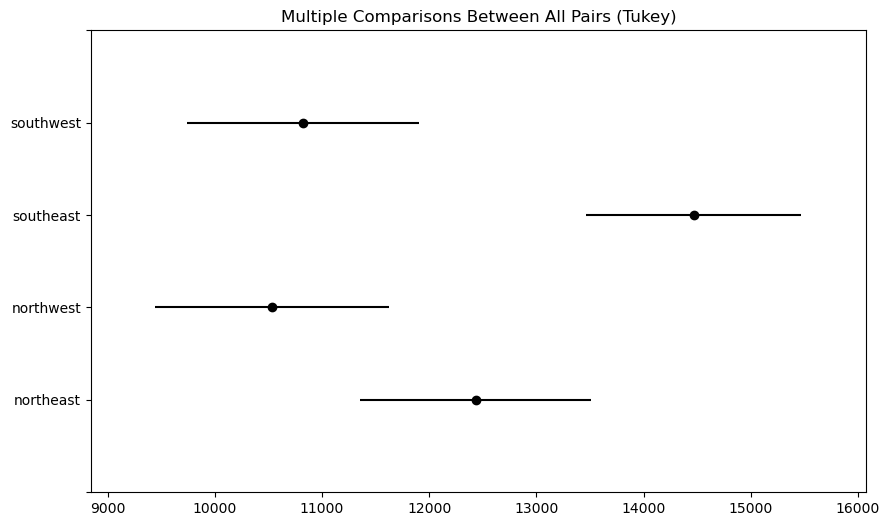

In [71]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

The visualisation abouve proves our alternative hypothesis that fifferent regions have significantly high different charges, on average. Southeast has the highest average in charges where northwest has the least.